In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.isotonic import IsotonicRegression
from princals import PRINCALS
from principals import PRINCIPALS

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

# Data for Guttman-Bell table
data = {
    'Object': [
        'Crowd', 
        'Modern community, Neighborhood', 
        'Public', 
        'Primary Group', 
        'Mob', 
        'Secondary Group', 
        'Audience'
    ],
    'Intensity of interaction': [1, 2, 1, 4, 4, 3, 2],
    'Frequency of interaction': [1, 3, 2, 4, 1, 3, 1],
    'Feeling of belong': [1, 2, 2, 4, 4, 3, 2],
    'Physical proximity': [2, 2, 1, 2, 2, 1, 2],
    'Formality of relationship': [2, 2, 1, 3, 3, 2, 2]
}

df = pd.DataFrame(data)


In [4]:
df

,Object,Intensity of interaction,Frequency of interaction,Feeling of belong,Physical proximity,Formality of relationship
0,Crowd,1,1,1,2,2
1,"Modern community, Neighborhood",2,3,2,2,2
2,Public,1,2,2,1,1
3,Primary Group,4,4,4,2,3
4,Mob,4,1,4,2,3
5,Secondary Group,3,3,3,1,2
6,Audience,2,1,2,2,2


In [5]:
np_array = df.drop(columns='Object').to_numpy()
np_array

array([[1, 1, 1, 2, 2],
       [2, 3, 2, 2, 2],
       [1, 2, 2, 1, 1],
       [4, 4, 4, 2, 3],
       [4, 1, 4, 2, 3],
       [3, 3, 3, 1, 2],
       [2, 1, 2, 2, 2]])

In [6]:
np.random.seed(0)

numerical_data = np.random.rand(10, 3)
ordinal_data = np.random.randint(0, 3, size=(10, 2))
categories = np.random.choice(['A', 'B', 'C'], size=(10, 3))
label_encoders = [LabelEncoder().fit(categories[:, i]) for i in range(categories.shape[1])]
nominal_data = np.array([le.transform(categories[:, i]) for i, le in enumerate(label_encoders)]).T

X = np.hstack([numerical_data, ordinal_data, nominal_data])

var_types = ['numerical'] * 3 + ['ordinal'] * 2 + ['nominal'] * 3
def preprocess_data(X, var_types):
    processed_data = []
    for i, var_type in enumerate(var_types):
        if var_type == 'numerical':
            scaler = StandardScaler()
            processed_data.append(scaler.fit_transform(X[:, i].reshape(-1, 1)))
        elif var_type == 'ordinal':
            processed_data.append(X[:, i].reshape(-1, 1))
        elif var_type == 'nominal':
            processed_data.append(X[:, i].reshape(-1, 1))
    
    return np.hstack(processed_data)

X_processed = preprocess_data(X, var_types)
print("Processed Data:\n", X_processed.shape)



Processed Data:
 (10, 8)


In [7]:
model = PRINCIPALS(X, n_components=2, var_types=var_types)
Z, A = model.fit(max_iter=100, tol=1e-6)

Loss: 12.553556227360934
Loss: 3.426185544567339
Loss: 2.303239520727478
Loss: 1.5525945735599074
Loss: 1.0470113222608743
Loss: 0.705377518604615
Loss: 0.47457390943098793
Loss: 0.3189048085862966
Loss: 0.21410643382365874
Loss: 0.1436624961766546
Loss: 0.09636211432963349
Loss: 0.06462349120153281
Loss: 0.043335246132256665
Loss: 0.02905932355238018
Loss: 0.019486651648547435
Loss: 0.013067809225267384
Loss: 0.008763630309519948
Loss: 0.005877335168067126
Loss: 0.003941761358833474
Loss: 0.002643696386847209
Loss: 0.0017731363410848065
Loss: 0.0011892690315460032
Loss: 0.0007976711960567534
Loss: 0.0005350227005210491
Loss: 0.00035885908671219304
Loss: 0.00024070121974386512
Loss: 0.00016144871513246785
Loss: 0.0001082909985261166
Loss: 7.263588135854845e-05
Loss: 4.8720402442576505e-05
Loss: 3.267917738767775e-05
Loss: 2.191955834529588e-05
Loss: 1.4702554607892927e-05
Loss: 9.861751052627641e-06
Loss: 6.614780511097424e-06
Loss: 4.4368726557852125e-06
Loss: 2.976038731248704e-06
Lo

In [8]:
Z

array([[-0.57699981,  0.04454931],
       [ 0.13902396, -0.60170211],
       [ 0.43379071,  0.08471785],
       [ 0.28642143, -0.2585467 ],
       [-0.29053149, -0.21417742],
       [ 0.43373909,  0.08491723],
       [ 0.00410071,  0.47275854],
       [-0.2906067 , -0.21388877],
       [ 0.00426323,  0.47213616],
       [-0.14320113,  0.12923592]])

In [9]:
A

array([[-3.12422673, -3.01235796,  1.34554353, -2.9057607 , -2.11868309,
         1.73868088, -1.0056531 , -2.29888899],
       [ 0.48908828, -0.96213279,  2.86173243,  1.24761919, -2.34759048,
        -2.641399  , -2.99810969,  2.17143024]])

In [10]:
guttman_data = np_array
var_types = ['ordinal', 'ordinal', 'ordinal', 'nominal', 'nominal']

guttman_model =  PRINCIPALS(X= guttman_data, n_components=2, var_types=var_types)
Z_guttman, W_guttman = guttman_model.fit(max_iter=100,tol=1e-6)

Loss: 1.4985885393252638
Loss: 0.7450982153243587
Loss: 0.5839123591398883
Loss: 0.47582202111980215
Loss: 0.4041104257800246
Loss: 0.3574472990400924
Loss: 0.3274616585568943
Loss: 0.30834369058698613
Loss: 0.29621349972726047
Loss: 0.2885394446555259
Loss: 0.2836927916986647
Loss: 0.28063468862377877
Loss: 0.27870598612583103
Loss: 0.27748976438986794


Loss: 0.27672279736664623
Loss: 0.2762390620022369
Loss: 0.27593389518825656
Loss: 0.2757413273538713
Loss: 0.2756197765139688
Loss: 0.2755430287415695
Loss: 0.27549455462981876
Loss: 0.2754639285879109
Loss: 0.27544457291796925
Loss: 0.2754323363270378
Loss: 0.2754245980258537
Loss: 0.27541970292674994
Loss: 0.2754166054680432
Loss: 0.2754146449307591
Loss: 0.2754134036571834
Loss: 0.2754126175532564
Converged


In [11]:
Z_guttman

array([[-0.49499292,  0.20587676],
       [-0.17952866, -0.05604663],
       [-0.36849771, -0.21832845],
       [ 0.4821548 , -0.31257576],
       [ 0.57393408,  0.48829091],
       [ 0.10527288, -0.58508131],
       [-0.11834248,  0.47786449]])

In [12]:
W_guttman

array([[ 2.61533307,  1.56822094,  2.58381772,  1.00040465,  2.44666584],
       [-0.1877705 , -2.1304071 , -0.41868508,  2.44932446,  1.00688935]])

In [16]:
object_labels = ['Crowd', 'Modern Community', 'Public', 'Primary Group', 'Mob', 'Secondary Group', 'Audience']


df_Z = pd.DataFrame(Z_guttman, columns = ['Component 1', 'Component 2'])
df_Z['object'] = object_labels

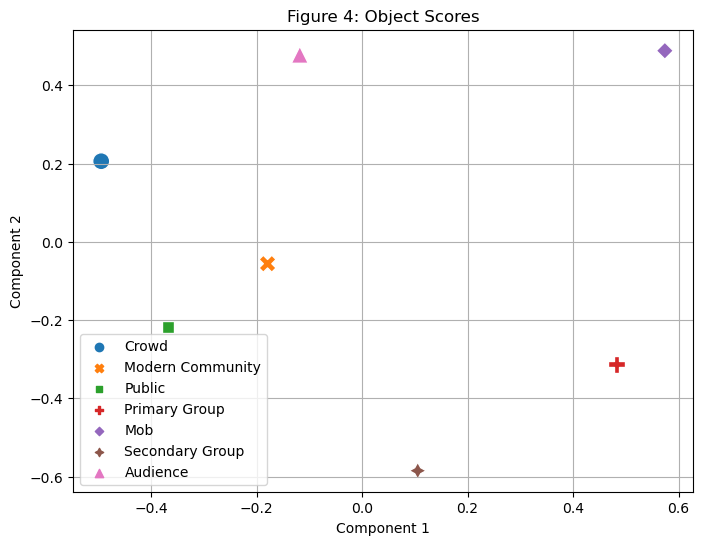

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_Z, x='Component 1', y='Component 2', hue='object', style='object', s=150)
plt.title('Figure 4: Object Scores')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()